In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from torchsummary import summary

In [2]:
training_data = datasets.MNIST('', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
testing_data = datasets.MNIST('', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))
batch_sizes = [64, 1024]

train_loader1 = torch.utils.data.DataLoader(training_data, batch_size=batch_sizes[0], shuffle=True)
test_loader1 = torch.utils.data.DataLoader(testing_data, batch_size=batch_sizes[0], shuffle=True)
train_loader2 = torch.utils.data.DataLoader(training_data, batch_size=batch_sizes[1], shuffle=True)
test_loader2 = torch.utils.data.DataLoader(testing_data, batch_size=batch_sizes[1], shuffle=True)

def calculate_params(model):
    total_params = sum(param.numel() for param in model.parameters() if param.requires_grad)
    return total_params



In [3]:
class NeuralNetwork1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784, 30)
        self.layer2 = nn.Linear(30, 50)
        self.output_layer = nn.Linear(50, 10)

    def forward(self, input_tensor):
        input_tensor = F.relu(self.layer1(input_tensor))
        input_tensor = F.relu(self.layer2(input_tensor))
        output_tensor = self.output_layer(input_tensor)
        return output_tensor


In [4]:
model1 = NeuralNetwork1()
model1_params = calculate_params(model1)
print(model1_params)

25610


In [5]:
loss_function1 = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.001)

In [6]:
epochs = 10
train_correct_mod1 = []
test_correct_mod1 = []
train_losses_mod1 = []
test_losses_mod1 = []
train_cost_list = []
train_acc_list = []
test_cost_list = []
test_acc_list = []

for epoch in range(epochs):
    train_corr = 0
    test_corr = 0

    # Training loop
    for batch, (x_train, y_train) in enumerate(train_loader1):
        y_pred = model1(x_train.view(-1, 784))
        train_loss = loss_function1(y_pred, y_train)
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum().item()  # Convert tensor to scalar
        train_corr += batch_corr

        optimizer1.zero_grad()
        train_loss.backward()
        optimizer1.step()

    train_losses_mod1.append(train_loss)
    train_correct_mod1.append(train_corr)

    # Testing loop
    with torch.no_grad():
        for batch, (x_test, y_test) in enumerate(test_loader1):
            y_val = model1(x_test.view(-1, 784))
            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum().item()

    test_loss = loss_function1(y_val, y_test)
    test_losses_mod1.append(test_loss)
    test_correct_mod1.append(test_corr)

# Extract losses and accuracies for plotting
for i in range(len(train_losses_mod1)):
    train_cost_list.append(train_losses_mod1[i].detach().numpy())
for i in range(len(test_losses_mod1)):
    test_cost_list.append(test_losses_mod1[i].detach().numpy())
for i in range(len(train_correct_mod1)):
    train_acc_list.append(train_correct_mod1[i] / 600)  # Adjust based on dataset size
for i in range(len(test_correct_mod1)):
    test_acc_list.append(test_correct_mod1[i] / 100)    # Adjust based on dataset size


In [7]:
class NeuralNetwork2(nn.Module):
    def __init__(self, input_features=784, hidden2=30, hidden3=50, output_features=10):
        super().__init__()
        self.layer1 = nn.Linear(input_features, hidden2)
        self.layer2 = nn.Linear(hidden2, hidden3)
        self.output_layer = nn.Linear(hidden3, output_features)

    def forward(self, input_tensor):
        input_tensor = F.relu(self.layer1(input_tensor))
        input_tensor = F.relu(self.layer2(input_tensor))
        output_tensor = self.output_layer(input_tensor)
        return output_tensor


In [8]:
model2 = NeuralNetwork2()
model2_params = calculate_params(model2)
print(model2_params)
summary(model2, (28 * 28,))

25610
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 30]          23,550
            Linear-2                   [-1, 50]           1,550
            Linear-3                   [-1, 10]             510
Total params: 25,610
Trainable params: 25,610
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.10
Estimated Total Size (MB): 0.10
----------------------------------------------------------------


In [9]:
loss_function2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.001)
epochs = 10
train_losses_mod2 = []
test_losses_mod2 = []
train_correct_mod2 = []
test_correct_mod2 = []
train_cost_list2 = []
train_acc_list2 = []
test_cost_list2 = []
test_acc_list2 = []

for epoch in range(epochs):
    train_corr = 0
    test_corr = 0

    # Training loop
    for batch, (x_train, y_train) in enumerate(train_loader2):
        y_pred = model2(x_train.view(-1, 784))
        loss = loss_function2(y_pred, y_train)
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum().item()  # Convert to scalar
        train_corr += batch_corr

        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()

    train_losses_mod2.append(loss)
    train_correct_mod2.append(train_corr)

    # Testing loop
    with torch.no_grad():
        for batch, (x_test, y_test) in enumerate(test_loader2):
            y_val = model2(x_test.view(-1, 784))
            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum().item()

    loss = loss_function2(y_val, y_test)
    test_losses_mod2.append(loss)
    test_correct_mod2.append(test_corr)

# Convert losses to numpy arrays for cost lists
for i in range(len(train_losses_mod2)):
    train_cost_list2.append(train_losses_mod2[i].detach().numpy())
for i in range(len(test_losses_mod2)):
    test_cost_list2.append(test_losses_mod2[i].detach().numpy())

# Convert correct counts to accuracy lists
for i in range(len(train_correct_mod2)):
    train_acc_list2.append(train_correct_mod2[i] / 600)  # Adjust based on dataset size
for i in range(len(test_correct_mod2)):
    test_acc_list2.append(test_correct_mod2[i] / 100)    # Adjust based on dataset size


In [10]:
print(train_cost_list2)

alpha_values = np.linspace(-1.0, 2.0, 20)
theta_array = []

for i in range(len(alpha_values)):
    theta = (1 - alpha_values[i]) * model1_params + alpha_values[i] * model2_params
    theta_array.append(theta)

print(alpha_values)

[array(0.7404625, dtype=float32), array(0.33348233, dtype=float32), array(0.27812663, dtype=float32), array(0.29794204, dtype=float32), array(0.2677962, dtype=float32), array(0.23473568, dtype=float32), array(0.24587412, dtype=float32), array(0.16800101, dtype=float32), array(0.19556694, dtype=float32), array(0.19839823, dtype=float32)]
[-1.         -0.84210526 -0.68421053 -0.52631579 -0.36842105 -0.21052632
 -0.05263158  0.10526316  0.26315789  0.42105263  0.57894737  0.73684211
  0.89473684  1.05263158  1.21052632  1.36842105  1.52631579  1.68421053
  1.84210526  2.        ]


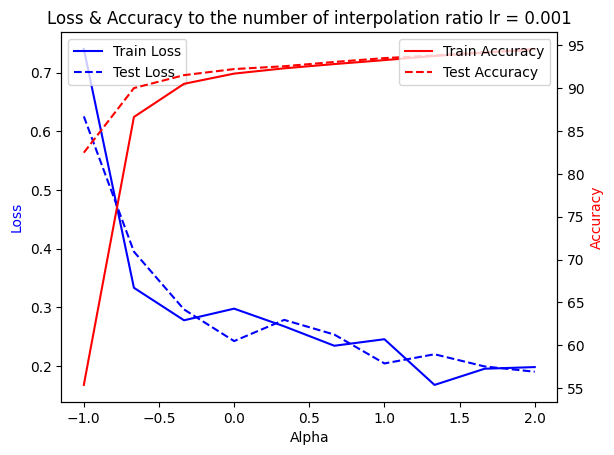

In [11]:
alpha_values = np.linspace(-1.0, 2.0, 10)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(alpha_values, train_cost_list2, 'b', label='Train Loss')
ax1.plot(alpha_values, test_cost_list2, 'b--', label='Test Loss')

ax2.plot(alpha_values, train_acc_list2, 'r', label='Train Accuracy')
ax2.plot(alpha_values, test_acc_list2, 'r--', label='Test Accuracy')

ax1.set_title('Loss & Accuracy to the number of interpolation ratio lr = 0.001')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Loss', color='b')
ax2.set_ylabel('Accuracy', color='r')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()





In [12]:
model1 = NeuralNetwork1()
loss_function1 = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.01)


In [13]:
epochs = 10
train_correct_mod1 = []
test_correct_mod1 = []
train_losses_mod1 = []
test_losses_mod1 = []

for epoch in range(epochs):
    train_corr = 0
    test_corr = 0

    # Training loop
    for batch, (x_train, y_train) in enumerate(train_loader1):
        y_pred = model1(x_train.view(-1, 784))
        train_loss = loss_function1(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum().item()  # Convert to scalar
        train_corr += batch_corr

        optimizer1.zero_grad()
        train_loss.backward()
        optimizer1.step()

    train_losses_mod1.append(train_loss.item())  # Store loss value
    train_correct_mod1.append(train_corr)

    # Testing loop
    with torch.no_grad():
        for batch, (x_test, y_test) in enumerate(test_loader1):
            y_val = model1(x_test.view(-1, 784))
            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum().item()

    test_loss = loss_function1(y_val, y_test)
    test_losses_mod1.append(test_loss.item())  # Store loss value
    test_correct_mod1.append(test_corr)


In [14]:
train_cost_list = []
train_acc_list = []
test_cost_list = []
test_acc_list = []

# Convert train and test losses to numpy arrays
for i in range(len(train_losses_mod1)):
    train_cost_list.append(train_losses_mod1[i])  # Loss is already a scalar, no need for detach().numpy()
for i in range(len(test_losses_mod1)):
    test_cost_list.append(test_losses_mod1[i])  # Loss is already a scalar, no need for detach().numpy()

# Convert correct counts to accuracies
for i in range(len(train_correct_mod1)):
    train_acc_list.append(train_correct_mod1[i] / 600)  # Assuming 600 training samples per batch
for i in range(len(test_correct_mod1)):
    test_acc_list.append(test_correct_mod1[i] / 100)    # Assuming 100 test samples per batch


In [15]:
model2 = NeuralNetwork2()
loss_function2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.01)
epochs = 10
train_correct_mod2 = []
test_correct_mod2 = []
train_losses_mod2 = []
test_losses_mod2 = []

for epoch in range(epochs):
    train_corr = 0
    test_corr = 0

    # Training loop
    for batch, (x_train, y_train) in enumerate(train_loader2):
        y_pred = model2(x_train.view(-1, 784))
        train_loss = loss_function2(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum().item()  # Convert to scalar
        train_corr += batch_corr

        optimizer2.zero_grad()
        train_loss.backward()
        optimizer2.step()

    train_losses_mod2.append(train_loss.item())  # Store loss as scalar
    train_correct_mod2.append(train_corr)

    # Testing loop
    with torch.no_grad():
        for batch, (x_test, y_test) in enumerate(test_loader2):
            y_val = model2(x_test.view(-1, 784))
            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum().item()  # Convert to scalar

    test_loss = loss_function2(y_val, y_test)
    test_losses_mod2.append(test_loss.item())  # Store loss as scalar
    test_correct_mod2.append(test_corr)


In [16]:
for i in range(len(train_losses_mod2)):
     train_cost_list.append(train_losses_mod2[i])
for i in range(len(test_losses_mod2)):
     test_cost_list.append(test_losses_mod2[i])
for i in range(len(train_correct_mod2)):
     train_acc_list.append(train_correct_mod2[i]/600)
for i in range(len(test_correct_mod2)):
     test_acc_list.append(test_correct_mod2[i]/100)

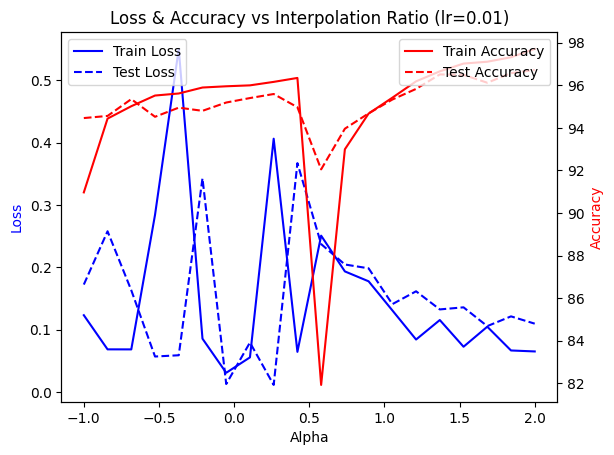

In [17]:
alpha_values = np.linspace(-1.0, 2.0, 20)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(alpha_values, train_cost_list, 'b', label='Train Loss')
ax1.plot(alpha_values, test_cost_list, 'b--', label='Test Loss')

ax2.plot(alpha_values, train_acc_list, 'r', label='Train Accuracy')
ax2.plot(alpha_values, test_acc_list, 'r--', label='Test Accuracy')

ax1.set_title('Loss & Accuracy vs Interpolation Ratio (lr=0.01)')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Loss', color='b')
ax2.set_ylabel('Accuracy', color='r')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


